In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/sales_data_3 (1).csv')
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
data.isnull().mean()

,0
Date,0.0
Day,0.0
Month,0.0
Year,0.0
Customer_Age,0.0
Age_Group,0.0
Customer_Gender,0.0
Country,0.0
State,0.0
Product_Category,0.0


Detect and deal with outliers (e.g., in revenue, order quantities, profit) that could distort the model.

In [ ]:
import matplotlib.pyplot as plt

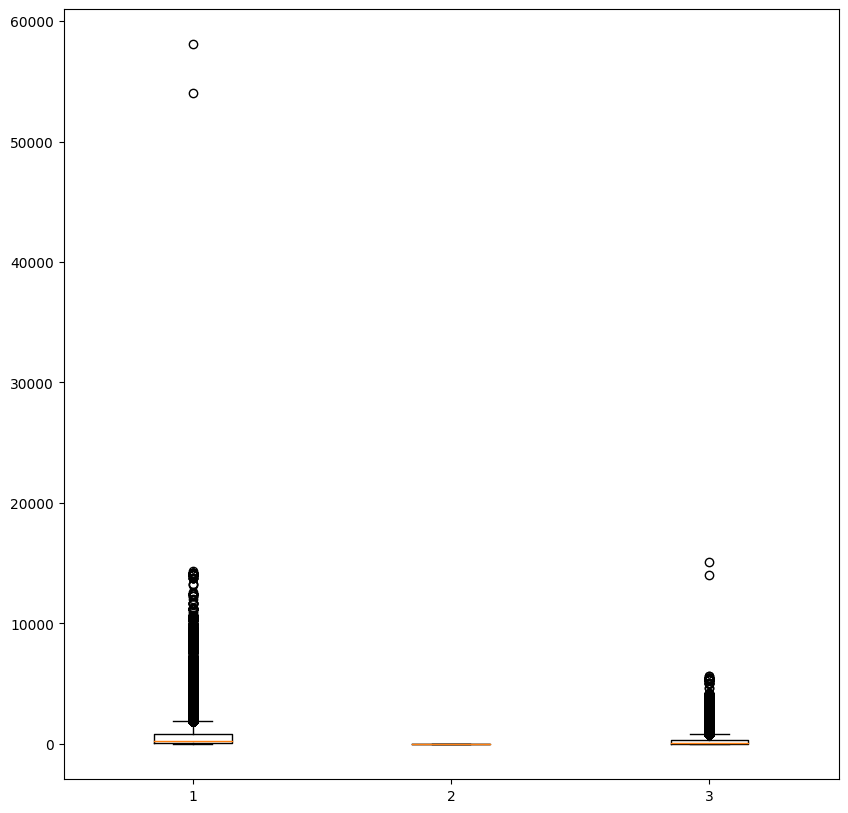

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot([data['Revenue'],data['Order_Quantity'],data['Profit']])
plt.show()

In [ ]:
Q1=data['Revenue'].quantile(0.25)
Q3=data['Revenue'].quantile(0.75)
IQ=Q3-Q1
lower_limit=Q1-1.5*IQ
upper_limit=Q3+1.5*IQ
data['Outlier_R']=data['Revenue'].apply(lambda x: 'Yes' if x < lower_limit or x > upper_limit else 'No')
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Outlier_R
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,No
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,No
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,Yes
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,Yes
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,No


In [ ]:
Q1=data['Order_Quantity'].quantile(0.25)
Q3=data['Order_Quantity'].quantile(0.75)
IQ=Q3-Q1
lower_limit=Q1-1.5*IQ
upper_limit=Q3+1.5*IQ
data['Outlier_O']=data['Order_Quantity'].apply(lambda x: 'Yes' if x < lower_limit or x > upper_limit else 'No')
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Outlier_R,Outlier_O
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,No,No
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,No,No
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,Yes,No
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,Yes,No
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,No,No


In [ ]:
Q1=data['Profit'].quantile(0.25)
Q3=data['Profit'].quantile(0.75)
IQ=Q3-Q1
lower_limit=Q1-1.5*IQ
upper_limit=Q3+1.5*IQ
data['Outlier_P']=data['Profit'].apply(lambda x: 'Yes' if x < lower_limit or x > upper_limit else 'No')
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Outlier_R,Outlier_O,Outlier_P
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,No,No,No
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,No,No,No
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,Yes,No,Yes
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,Yes,No,Yes
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,No,No,No


Correct Data Types:
Ensure that each column has the correct data type (e.g., dates as datetime, categorical data as category, numerical data as integers/floats).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data['Product_Category']=data['Product_Category'].astype('category')
data['Sub_Category']=data['Sub_Category'].astype('category')
data['Customer_Gender']=data['Customer_Gender'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  category      
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  category      
 10  Sub_Category      113036 non-null  category      
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

Date-Time Features:
Extract useful features from the date (e.g., day of the week, month, year, or seasonality).

In [ ]:
data['Day_Of_Week']=data['Date'].dt.day_name()
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
#seasonality
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Outlier_R,Outlier_O,Outlier_P,Day_Of_Week
0,2013-11-26,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,8,45,120,590,360,950,No,No,No,Tuesday
1,2015-11-26,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,8,45,120,590,360,950,No,No,No,Thursday
2,2014-03-23,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,23,45,120,1366,1035,2401,Yes,No,Yes,Sunday
3,2016-03-23,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,20,45,120,1188,900,2088,Yes,No,Yes,Wednesday
4,2014-05-15,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,4,45,120,238,180,418,No,No,No,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,4,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,...,3,24,64,112,72,184,No,No,No,Tuesday
113032,2014-04-02,2,4,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,22,24,64,655,528,1183,No,No,No,Wednesday
113033,2016-04-02,2,4,2016,18,Youth (<25),M,Australia,Queensland,Clothing,...,22,24,64,655,528,1183,No,No,No,Saturday
113034,2014-03-04,4,3,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,24,24,64,684,576,1260,No,No,No,Tuesday


Create New Variables:
Create new features like profit margins (profit/revenue), customer lifetime value (if multiple transactions exist), and average order value.


In [ ]:
data['Profit_Margin']=data['Profit']/data['Revenue']
data['Average_Value']=data['Revenue']/data['Order_Quantity']
#customer Lifetime Value
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Unit_Price,Profit,Cost,Revenue,Outlier_R,Outlier_O,Outlier_P,Day_Of_Week,Profit_Margin,Average_Value
0,2013-11-26,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,120,590,360,950,No,No,No,Tuesday,0.621053,118.750000
1,2015-11-26,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,120,590,360,950,No,No,No,Thursday,0.621053,118.750000
2,2014-03-23,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,120,1366,1035,2401,Yes,No,Yes,Sunday,0.568930,104.391304
3,2016-03-23,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,120,1188,900,2088,Yes,No,Yes,Wednesday,0.568966,104.400000
4,2014-05-15,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,120,238,180,418,No,No,No,Thursday,0.569378,104.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,4,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,...,64,112,72,184,No,No,No,Tuesday,0.608696,61.333333
113032,2014-04-02,2,4,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,64,655,528,1183,No,No,No,Wednesday,0.553677,53.772727
113033,2016-04-02,2,4,2016,18,Youth (<25),M,Australia,Queensland,Clothing,...,64,655,528,1183,No,No,No,Saturday,0.553677,53.772727
113034,2014-03-04,4,3,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,64,684,576,1260,No,No,No,Tuesday,0.542857,52.500000


Encoding Categorical Variables:
Encode categorical variables (e.g., gender, country, product category) into numerical values using one-hot encoding or label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Customer_Gender']=label.fit_transform(data['Customer_Gender'])
data['Country']=label.fit_transform(data['Country'])
data['Product_Category']=label.fit_transform(data['Product_Category'])
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Unit_Price,Profit,Cost,Revenue,Outlier_R,Outlier_O,Outlier_P,Day_Of_Week,Profit_Margin,Average_Value
0,2013-11-26,26,11,2013,19,Youth (<25),1,1,British Columbia,0,...,120,590,360,950,No,No,No,Tuesday,0.621053,118.750000
1,2015-11-26,26,11,2015,19,Youth (<25),1,1,British Columbia,0,...,120,590,360,950,No,No,No,Thursday,0.621053,118.750000
2,2014-03-23,23,3,2014,49,Adults (35-64),1,0,New South Wales,0,...,120,1366,1035,2401,Yes,No,Yes,Sunday,0.568930,104.391304
3,2016-03-23,23,3,2016,49,Adults (35-64),1,0,New South Wales,0,...,120,1188,900,2088,Yes,No,Yes,Wednesday,0.568966,104.400000
4,2014-05-15,15,5,2014,47,Adults (35-64),0,0,New South Wales,0,...,120,238,180,418,No,No,No,Thursday,0.569378,104.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,4,2016,41,Adults (35-64),1,4,England,2,...,64,112,72,184,No,No,No,Tuesday,0.608696,61.333333
113032,2014-04-02,2,4,2014,18,Youth (<25),1,0,Queensland,2,...,64,655,528,1183,No,No,No,Wednesday,0.553677,53.772727
113033,2016-04-02,2,4,2016,18,Youth (<25),1,0,Queensland,2,...,64,655,528,1183,No,No,No,Saturday,0.553677,53.772727
113034,2014-03-04,4,3,2014,37,Adults (35-64),0,2,Seine (Paris),2,...,64,684,576,1260,No,No,No,Tuesday,0.542857,52.500000


In [ ]:
# 3. Data Normalization/Scaling

In [ ]:
df_dropped=data.drop(columns=['Date','Age_Group','State','Day_Of_Week','Sub_Category','Product','Outlier_O','Outlier_P','Outlier_R'])
df_dropped.head()

,Day,Month,Year,Customer_Age,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_Margin,Average_Value
0,26,11,2013,19,1,1,0,8,45,120,590,360,950,0.621053,118.750000
1,26,11,2015,19,1,1,0,8,45,120,590,360,950,0.621053,118.750000
2,23,3,2014,49,1,0,0,23,45,120,1366,1035,2401,0.568930,104.391304
3,23,3,2016,49,1,0,0,20,45,120,1188,900,2088,0.568966,104.400000
4,15,5,2014,47,0,0,0,4,45,120,238,180,418,0.569378,104.500000


In [ ]:
#Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m_scaler=MinMaxScaler()
m_scaled=m_scaler.fit_transform(df_dropped)
m_scaled

array([[0.83333333, 0.90909091, 0.4       , ..., 0.01632456, 0.83616099,
        0.03278345],
       [0.83333333, 0.90909091, 0.8       , ..., 0.01632456, 0.83616099,
        0.03278345],
       [0.73333333, 0.18181818, 0.6       , ..., 0.04131079, 0.7699341 ,
        0.02876871],
       ...,
       [0.03333333, 0.27272727, 1.        , ..., 0.02033682, 0.75055442,
        0.01461561],
       [0.1       , 0.18181818, 0.6       , ..., 0.02166276, 0.73680672,
        0.01425975],
       [0.1       , 0.18181818, 1.        , ..., 0.0207501 , 0.73656611,
        0.01425367]])

In [ ]:
#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(df_dropped)
scaled

array([[ 1.17681656,  1.30728516, -1.10155916, ...,  0.14943954,
         0.90804019, -0.34651564],
       [ 1.17681656,  1.30728516,  0.4701442 , ...,  0.14943954,
         0.90804019, -0.34651564],
       [ 0.83519036, -0.99276675, -0.31570748, ...,  1.25784403,
         0.58939429, -0.36391482],
       ...,
       [-1.55619302, -0.70526027,  1.25599588, ...,  0.32742593,
         0.4961504 , -0.42525198],
       [-1.32844222, -0.99276675, -0.31570748, ...,  0.38624546,
         0.43000433, -0.42679421],
       [-1.32844222, -0.99276675,  1.25599588, ...,  0.34575929,
         0.42884664, -0.42682055]])